In [2]:
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from datetime import datetime, timezone, timedelta
import os
import numpy as np
import pandas as pd
from pyproj import Transformer
import xarray as xr
import xmitgcm as xm
import time
import socket

# Displaying surface forcing from MITgcm output

In [3]:
lake_name = "geneva"
sta_name = 'geneva_lexplore'

In [4]:
model = 'geneva_200m_winter2023'
with open('..//config.json', 'r') as file:
    mitgcm_config = json.load(file)[socket.gethostname()][model]
    
datapath = mitgcm_config['datapath']
gridpath = mitgcm_config['gridpath']
ref_date = mitgcm_config['ref_date']
dt_mitgcm_results = mitgcm_config['dt']

In [5]:
start_date = datetime(2023, 12, 1, 0, 0, 0)
end_date = datetime(2024, 4, 1, 0, 0, 0)

In [6]:
var_to_plot = 'surForcT'

In [7]:
with open(os.path.join('..//..//config_points.json'), 'r') as file:
    config_points = json.load(file)[sta_name]
    
xc_mitgcm_station = config_points['xc_mitgcm_200m']
yc_mitgcm_station = config_points['yc_mitgcm_200m']

## Import MITgcm results

In [8]:
ds_to_plot = xm.open_mdsdataset(
                            datapath, 
                            grid_dir=gridpath, 
                            ref_date=ref_date, 
                            prefix='surForc_hourly', 
                            delta_t=dt_mitgcm_results, 
                            endian='<')

# Plot

In [30]:
ds_to_plot['surForcT'].long_name

'model surface forcing for Temperature, >0 increases theta'

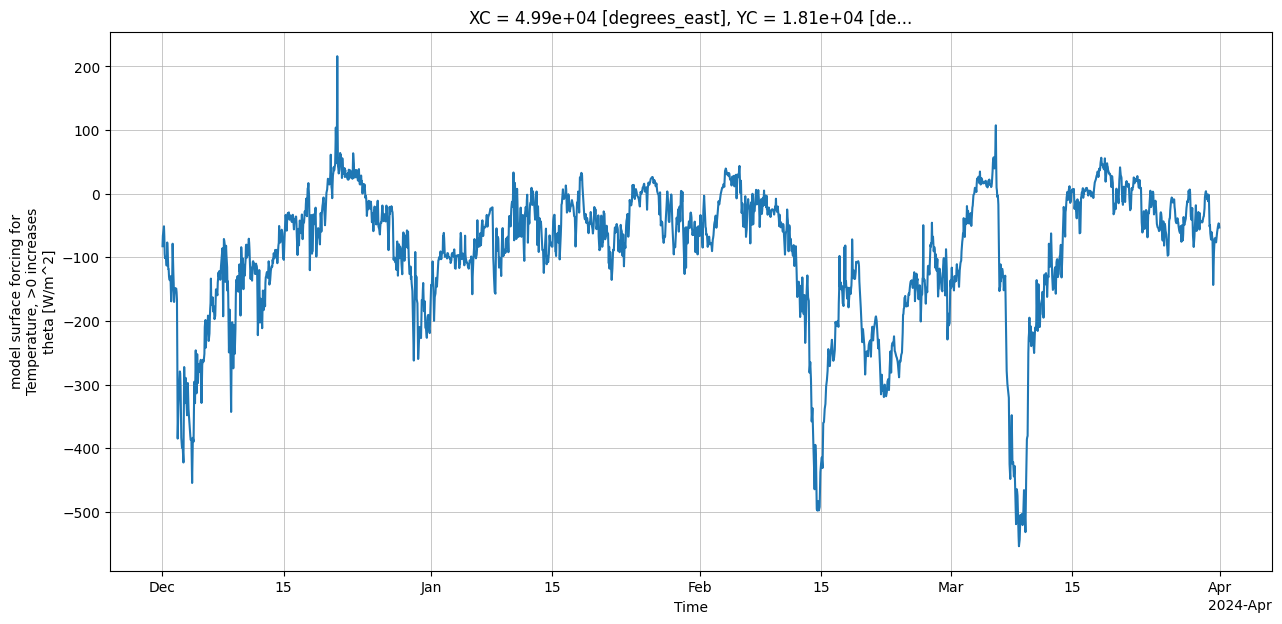

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))

ds_to_plot['surForcT'].sel(XC=xc_mitgcm_station, YC=yc_mitgcm_station, method='nearest').sel(time=slice(start_date, end_date)).plot()

plt.grid(True, which='both', linestyle='-', linewidth=0.5)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))

#plt.savefig(rf"output_plots\{lake_name}\timeseries_2023.png")

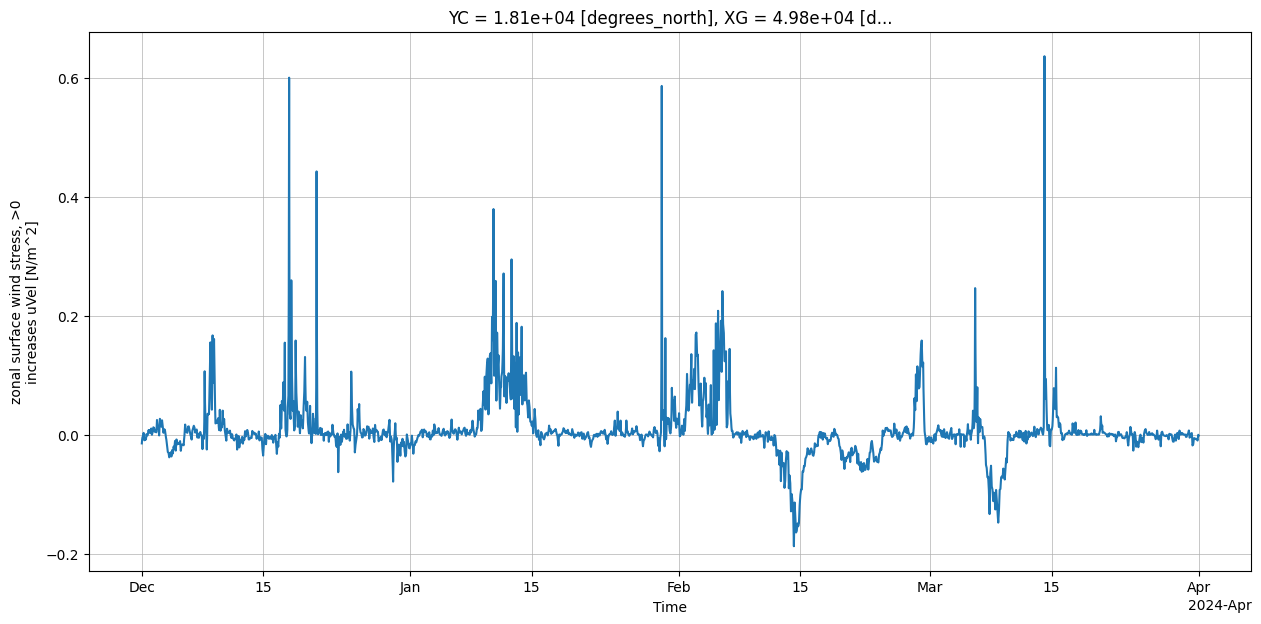

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))

ds_to_plot['oceTAUX'].sel(XG=xc_mitgcm_station, YC=yc_mitgcm_station, method='nearest').sel(time=slice(start_date, end_date)).plot()

plt.grid(True, which='both', linestyle='-', linewidth=0.5)

#plt.savefig(rf"output_plots\{lake_name}\timeseries_2023.png")

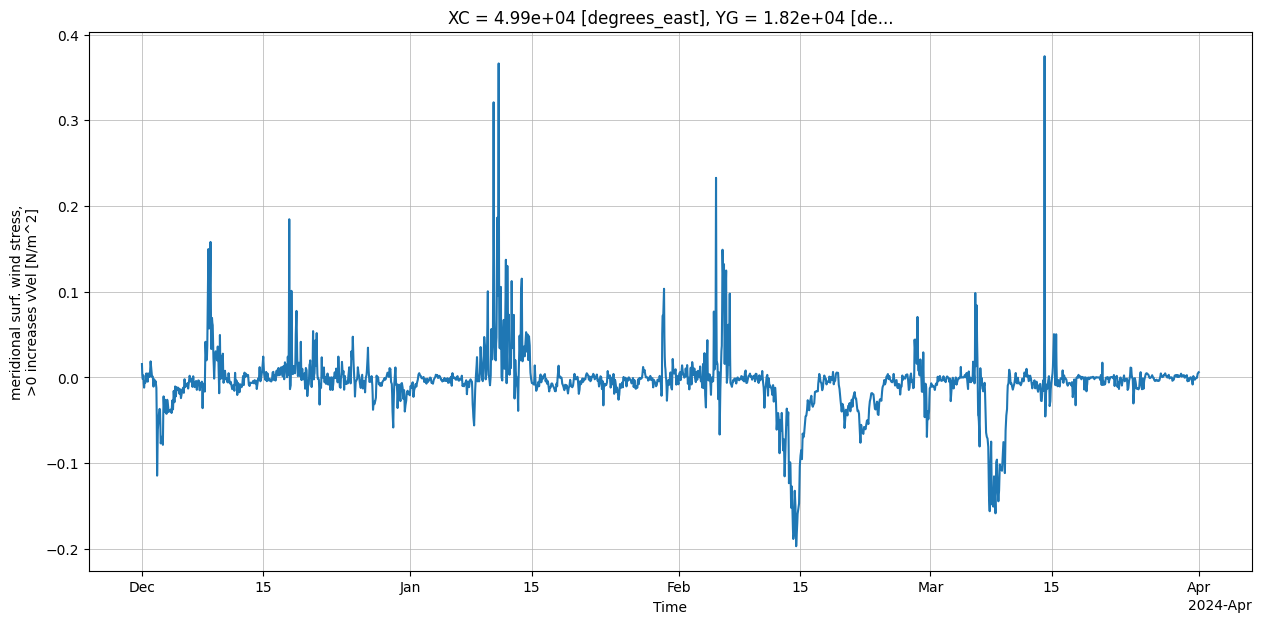

In [25]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))

ds_to_plot['oceTAUY'].sel(XC=xc_mitgcm_station, YG=yc_mitgcm_station, method='nearest').sel(time=slice(start_date, end_date)).plot()

plt.grid(True, which='both', linestyle='-', linewidth=0.5)

#plt.savefig(rf"output_plots\{lake_name}\timeseries_2023.png")